# CS 760: M: - HW 3
## Programming
# Muhammad Musa

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

## Q1

In [152]:
filename = "D2z.txt"
df = pd.read_csv(filename, sep=" ", header = None, names=["Feature1", "Feature2", "Label"])
df

,Feature1,Feature2,Label
0,-0.333338,-0.087171,0
1,-1.531730,0.358194,1
2,1.549590,-0.364050,0
3,-1.349910,0.252063,1
4,1.283850,-0.531146,0
...,...,...,...
195,-0.697750,1.098280,1
196,1.161160,-0.733751,0
197,-1.288480,0.443773,1
198,-1.384200,0.526523,1


In [355]:
# making the test dataset
x = np.linspace(-2,2,41)
y = np.linspace(-2,2,41)
xx, yy = np.meshgrid(x,y)
coords = np.column_stack((xx.ravel(), yy.ravel()))
results = pd.DataFrame(coords)

training_set = df.iloc[:, :-1]
training_set = training_set.to_numpy()


In [463]:
def knn(k, training_set, test_point,df, give_count = False):
    dists = np.sqrt(np.sum(np.square(training_set - test_point), axis = 1))
    first_k = np.argsort(dists, kind='mergesort')[:k]
    n_labels = [df.iloc[i, -1] for i in first_k]
    most_common = np.bincount(n_labels).argmax()
    perc = n_labels.count(1) / len(n_labels)
    if give_count:
        return most_common, perc
    else:
        return most_common 

In [379]:
# running 1NN on the coordinates created
labels_1 = []
for each in tqdm(coords):
    labels_1.append(knn(1,training_set, each,df))

100%|██████████| 1681/1681 [00:00<00:00, 13162.13it/s]


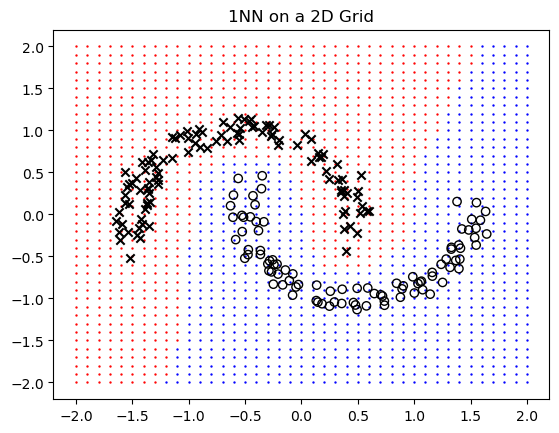

In [380]:
results["predictions"] = labels_1
colors = {1.0: 'r', 0.0: 'b'}
markers = {1.0:'x', 0.0:'o'}

for class_label, color in colors.items():
    subset = results[results.iloc[:,-1] == class_label]
    plt.scatter(subset.iloc[:,0], subset.iloc[:,1],  c=color, label = class_label, marker='.', s = 2)
    
for class_label, maker in markers.items():
    subset = df[df.iloc[:,-1] == class_label]
    if maker == 'x':
        plt.scatter(subset.iloc[:,0], subset.iloc[:,1], label = class_label, marker=maker,c = 'black')
    else:
        plt.scatter(subset.iloc[:,0], subset.iloc[:,1], label = class_label, marker=maker,facecolor = 'none', edgecolor = 'black')
        
plt.title("1NN on a 2D Grid")
plt.show()

## Q2

In [464]:
filename = "emails.csv"
df_emails = pd.read_csv(filename)

In [465]:
train1 = df_emails.iloc[1000:]
train2 = df_emails.iloc[0:1000].append(df_emails[2000:])
train3 = df_emails.iloc[0:2000].append(df_emails[3000:])
train4 = df_emails.iloc[0:3000].append(df_emails[4000:])
train5 = df_emails.iloc[0:4000]
trains = [train1, train2, train3, train4, train5]

test1 = df_emails.iloc[:1000]
test2 = df_emails.iloc[1000:2000]
test3 = df_emails.iloc[2000:3000]
test4 = df_emails.iloc[3000:4000]
test5 = df_emails.iloc[4000:]
tests = [test1, test2, test3, test4, test5]

C:\Users\muham\AppData\Local\Temp\ipykernel_39160\3095967430.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train2 = df_emails.iloc[0:1000].append(df_emails[2000:])
C:\Users\muham\AppData\Local\Temp\ipykernel_39160\3095967430.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train3 = df_emails.iloc[0:2000].append(df_emails[3000:])
C:\Users\muham\AppData\Local\Temp\ipykernel_39160\3095967430.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train4 = df_emails.iloc[0:3000].append(df_emails[4000:])


In [466]:
def get_vals(train,test):
    training_set = train.iloc[:, 1:-1]
    training_set = training_set.to_numpy()
    test_coords = test.iloc[:, 1:-1]
    test_coords = test_coords.to_numpy()  
    return training_set, test_coords

In [505]:
def eval_knn(labels, actual, other = False):
    tn, tp, fn, fp = 0,0,0,0
    for j in range(len(labels)):
        if labels[j] == actual.iloc[:,-1].tolist()[j]:
            if labels[j] == 0:
                tn += 1
            else:
                tp += 1
        else:
            if labels[j] == 1:
                fp +=1
            else:
                fn += 1

    recall = tp / (tp+fn)
    fpr =  fp / (fp + tn)
    if other:
        return recall, fpr
    else:
        acc = (tp + tn) / (tp +tn+fn+fp)
        prec = tp / (tp+fp)
        return acc, prec, recall

In [397]:
# 5-fold cross validation for 1NN
accs, precs, recalls= [], [], []
k = 1
for i in (range(len(tests))):
    training_set, test_coords = get_vals(trains[i], tests[i])
    labels_n = []
    for each in tqdm(test_coords):
        labels_n.append(knn(k,training_set, each,trains[i]))
    accs.append(eval_knn(labels_n, tests[i])[0])
    precs.append(eval_knn(labels_n, tests[i])[1])
    recalls.append(eval_knn(labels_n, tests[i])[2])

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [01:19<00:00, 12.55it/s]


In [400]:
print("1NN Rsults:")
for i in range(len(accs)):
    print(f"Accuracy for fold {i}: {accs[i]}\nPrecision for fold {i}: {precs[i]}\nRecall for fold {i}: {recalls[i]}")
    print()
print("\nAverage accuracy:", sum(accs)/len(accs))
print("Average precision:", sum(precs)/len(precs))
print("Average recall:", sum(recalls)/len(recalls))

1NN Rsults:
Accuracy for fold 0: 0.825
Precision for fold 0: 0.6536312849162011
Recall for fold 0: 0.8210526315789474

Accuracy for fold 1: 0.855
Precision for fold 1: 0.6896551724137931
Recall for fold 1: 0.8664259927797834

Accuracy for fold 2: 0.863
Precision for fold 2: 0.7220543806646526
Recall for fold 2: 0.8415492957746479

Accuracy for fold 3: 0.854
Precision for fold 3: 0.7215568862275449
Recall for fold 3: 0.8197278911564626

Accuracy for fold 4: 0.775
Precision for fold 4: 0.6051948051948052
Recall for fold 4: 0.761437908496732


Average accuracy: 0.8344000000000001
Average precision: 0.6784185058833994
Average recall: 0.8220387439573147


## Q3

In [329]:
def get_data_logi(train, test):
    x_train = train.iloc[:, 1:-1]
    x_train = x_train.to_numpy().T
    x_test = test.iloc[:, 1:-1]
    x_test = x_test.to_numpy().T
    
    y_train = train.iloc[:,-1]
    y_train = y_train.to_numpy()
    y_train = np.expand_dims(y_train, axis=0)
    y_test = test.iloc[:,-1]
    y_test = y_test.to_numpy()
    y_test = np.expand_dims(y_test, axis=0)
    return x_train, y_train, x_test, y_test

In [424]:

def cross_entropy_loss(h_x, y):
    m = y.shape[1]
    return (-(y * np.log(h_x+1e-9) + ((1-y)*np.log(1-h_x + 1e-9)))).mean()

def sigmoid(x):
    x = np.clip(x, -500, 500) 
    sigmoid = 1/(1+np.exp(-x))
    return sigmoid

def gradient_des(x, thetas, h_x, y, alpha,bias):
    loss = cross_entropy_loss(h_x, y)
    updated_g = np.dot(h_x-y, x.transpose()) / x.shape[1]
    updated_b = np.mean(h_x-y)
    thetas= thetas - alpha*updated_g
    bias = bias - alpha*updated_b
    return thetas, bias

def logi_regression(x_train, y_train, epochs, theta, lr=0.0025, bias =0):
    for e in tqdm(range(epochs)):
        h_x = sigmoid(np.dot(theta, x_train) + bias)
        theta, bias = gradient_des(x_train, theta, h_x, y_train, lr, bias)
    return theta, bias

def predictions(x_test, theta, bias, threshold = 0.5):
    h_x_t =  sigmoid(np.dot(theta, x_test) + bias)
    return np.where(h_x_t<threshold, 0,1)


In [486]:

def eval(y_pred, y_test, other = False):
    tp = np.count_nonzero(np.logical_and(y_test == y_pred, y_pred == 1))
    tn = np.count_nonzero(np.logical_and(y_test == y_pred, y_pred == 0))
    fp = np.count_nonzero(np.logical_and(y_test != y_pred, y_pred == 1))
    fn = np.count_nonzero(np.logical_and(y_test != y_pred, y_pred == 0))
    
    recall = tp / (tp+fn)
    fpr =  fp / (fp + tn)
    
    if other:
        return recall, fpr
    else:
        acc = (tp + tn) / (tp +tn+fn+fp)
        prec = tp / (tp+fp)
        return acc, prec, recall

In [421]:
logi_acc, logi_precs, logi_recalls = [], [], []
for i in range(len(tests)):
        x_train, y_train, x_test, y_test = get_data_logi(trains[i], tests[i])
        theta, bias = logi_regression(x_train, y_train, 5000, np.zeros((1,x_train.shape[0])))
        y_pred = (predictions(x_test, theta, bias))
        acc, prec, rec = eval(y_pred, y_test)
        logi_acc.append(acc)
        logi_precs.append(prec)
        logi_recalls.append(rec)
        

100%|██████████| 5000/5000 [06:31<00:00, 12.78it/s]


In [427]:
print("Logistic Regression Results:")
for i in range(len(accs)):
    print(f"Accuracy for fold {i}: {logi_acc[i]}\nPrecision for fold {i}: {logi_precs[i]}\nRecall for fold {i}: {logi_recalls[i]}")
    print()
print("\nAverage accuracy:", sum(logi_acc)/len(logi_acc))
print("Average precision:", sum(logi_precs)/len(logi_precs))
print("Average recall:", sum(logi_recalls)/len(logi_recalls))

Logistic Regression Results:
Accuracy for fold 0: 0.943
Precision for fold 0: 0.9253731343283582
Recall for fold 0: 0.8701754385964913

Accuracy for fold 1: 0.948
Precision for fold 1: 0.9213483146067416
Recall for fold 1: 0.8880866425992779

Accuracy for fold 2: 0.934
Precision for fold 2: 0.9325396825396826
Recall for fold 2: 0.8274647887323944

Accuracy for fold 3: 0.935
Precision for fold 3: 0.9074733096085409
Recall for fold 3: 0.8673469387755102

Accuracy for fold 4: 0.913
Precision for fold 4: 0.8788927335640139
Recall for fold 4: 0.8300653594771242


Average accuracy: 0.9346
Average precision: 0.9131254349294673
Average recall: 0.8566278336361595


## Q4

In [472]:
avg_acc = []
for k in [1,3,5,7,10]:
    k_accs = []
    # k_precs, k_recalls= [], [], []
    for i in tqdm(range(len(tests))):
        training_set, test_coords = get_vals(trains[i], tests[i])
        labels_n = []
        for each in (test_coords):
            labels_n.append(knn(k,training_set, each,trains[i]))
        k_accs.append(eval_knn(labels_n, tests[i])[0])
        # k_precs.append(eval_knn(labels_n, tests[i])[1])
        # k_recalls.append(eval_knn(labels_n, tests[i])[2])
    avg_acc.append(sum(k_accs) / len(k_accs))

100%|██████████| 5/5 [05:54<00:00, 70.85s/it]


In [473]:
avg_acc

[0.8332, 0.8423999999999999, 0.8417999999999999, 0.8454, 0.8552]

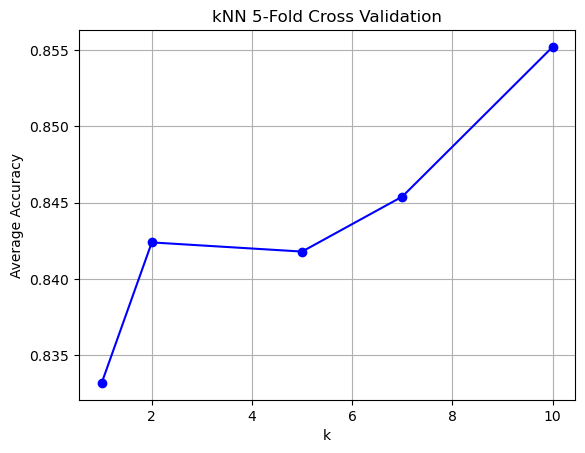

In [474]:
# plotting the accuracies
plt.plot([1,2,5,7,10], avg_acc, '-o', c = 'b' )
plt.title("kNN 5-Fold Cross Validation")
plt.xlabel("k")
plt.ylabel("Average Accuracy")
plt.grid(True)
plt.show()

## Question 5

In [475]:
# 5-NN with no CV:
k = 5
idx = 4 # getting the last fold
training_set, test_coords = get_vals(trains[idx], tests[idx])
knn_labels = []
knn_conf = []
for each in tqdm(test_coords):
    knn_labels.append(knn(k,training_set, each,trains[idx], give_count=True)[0])
    knn_conf.append(knn(k,training_set, each,trains[idx], give_count=True)[1])

# Logistic Regression    
x_train, y_train, x_test, y_test = get_data_logi(trains[idx], tests[idx])
theta, bias = logi_regression(x_train, y_train, 5000, np.zeros((1,x_train.shape[0])))
# y_pred = (predictions(x_test, theta, bias))

100%|██████████| 5000/5000 [06:19<00:00, 13.16it/s]


In [503]:
def get_preds(knn_conf, threshold):
    labels = []
    for i in knn_conf:
        if i <= threshold:
            labels.append(0)
        else:
            labels.append(1)
    return labels

In [510]:
tprs_logi, fprs_logi= [], []
thresholds_logi = np.linspace(0,1,150)
for each in thresholds_logi:
    y_pred = (predictions(x_test, theta, bias, each))
    tpr,fpr = eval(y_pred, y_test, True)
    tprs_logi.append(tpr)
    fprs_logi.append(fpr)
        
tprs_knn, fprs_knn= [1], [1]
thresholds_knn = np.linspace(0,1,150)
for each in thresholds_knn:
    y_pred_knn = get_preds(knn_conf, each)
    tpr,fpr = eval_knn(y_pred_knn, tests[idx], True)
    tprs_knn.append(tpr)
    fprs_knn.append(fpr)   
tprs_knn.append(0)
fprs_knn.append(0)
    
auc_knn = -np.trapz(tprs_knn, fprs_knn)
auc_logi = -np.trapz(tprs_logi, fprs_logi)

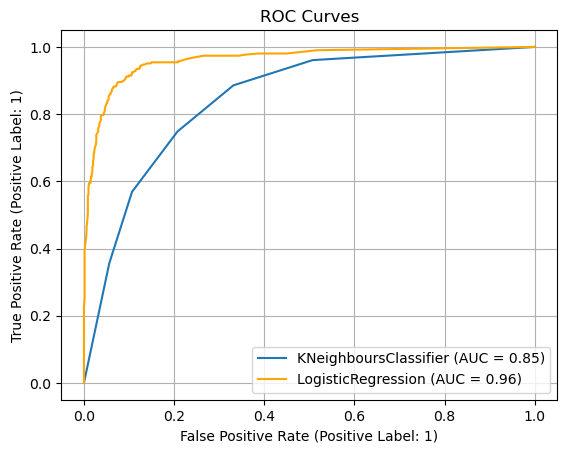

In [511]:
plt.plot(fprs_knn, tprs_knn, '-', label = f"KNeighboursClassifier (AUC = {round(auc_knn, 2)})")
plt.plot(fprs_logi, tprs_logi, '-', c = "orange", label = f"LogisticRegression (AUC = {round(auc_logi, 2)})")
plt.grid(True)
plt.legend(loc = "lower right")
plt.title("ROC Curves")
plt.xlabel("False Positive Rate (Positive Label: 1)")
plt.ylabel("True Positive Rate (Positive Label: 1)")
plt.show()